In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
from countryinfo import CountryInfo
import re
from tabulate import tabulate

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [63]:
data = pd.read_csv('data/merged_data_cleaned.csv')

In [64]:
data

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

### How many observations are there?

In [65]:
print(f"The dataset has {len(data)} observations")

The dataset has 1339 observations


### How many features are in the dataset?

In [66]:
print(f"All features are: {data.columns.value_counts().sum()}")

All features are: 44


### Which features are numerical and which are categorical?

In [67]:
data_types = data.dtypes.reset_index()
data_types = data_types.rename(columns={'index': 'feature', 0: 'date_type'})
data_types

,feature,date_type
0,Unnamed: 0,int64
1,Species,object
2,Owner,object
3,Country.of.Origin,object
4,Farm.Name,object
5,Lot.Number,object
6,Mill,object
7,ICO.Number,object
8,Company,object
9,Altitude,object


##### Numerical features - data that can be manipulated with arithmetic operations
##### Categorical features - data that can't be manipulated with arithmetic operations and present categories, groups, labels

### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

In [68]:
#Replace all "." with "_" in the column name
data.columns = data.columns.str.replace('.', '_')

In [69]:
#Make lower case all column names
data.columns = data.columns.str.lower()

In [70]:
#Change firs column name
data = data.rename(columns={'unnamed: 0': 'id'})

In [71]:
data

,id,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

In [72]:
# Read and check bag_weight. We can remove "kg" in the data
data.bag_weight

0       60 kg
1       60 kg
2           1
3       60 kg
4       60 kg
        ...  
1334     2 kg
1335     2 kg
1336     1 kg
1337    5 lbs
1338    5 lbs
Name: bag_weight, Length: 1339, dtype: object

In [73]:
filtered_data = data[['country_of_origin', 'bag_weight']]
filtered_data

,country_of_origin,bag_weight
0,Ethiopia,60 kg
1,Ethiopia,60 kg
2,Guatemala,1
3,Ethiopia,60 kg
4,Ethiopia,60 kg
...,...,...
1334,Ecuador,2 kg
1335,Ecuador,2 kg
1336,United States,1 kg
1337,India,5 lbs


In [74]:
new_data = filtered_data[filtered_data['bag_weight'].str.endswith('lbs', na=False)]
result = new_data.groupby('country_of_origin')
result.value_counts()

country_of_origin            bag_weight
Brazil                       5 lbs          2
Colombia                     5 lbs          2
                             2 lbs          1
                             3 lbs          1
                             4 lbs          1
Costa Rica                   3 lbs          5
                             1 lbs          2
                             150 lbs        1
                             2 lbs          1
Ecuador                      5 lbs          1
El Salvador                  1 kg,lbs       1
Ethiopia                     132 lbs        1
Guatemala                    3 lbs          1
                             5 lbs          1
                             55 lbs         1
Haiti                        4 lbs          3
                             130 lbs        1
India                        5 lbs          1
Indonesia                    2 kg,lbs       1
Mexico                       5 lbs          3
Nicaragua                    5 lbs      

In [75]:
data.bag_weight.value_counts()

bag_weight
1 kg        331
60 kg       256
69 kg       200
70 kg       156
2 kg        122
100 lbs      59
30 kg        29
5 lbs        23
6            19
20 kg        14
50 kg        14
10 kg        11
59 kg        10
1 lbs         8
3 lbs         7
1             7
5 kg          7
2 lbs         5
18975 kg      4
80 kg         4
4 lbs         4
0 lbs         3
46 kg         3
6 kg          2
9000 kg       2
25 kg         2
35 kg         2
12000 kg      2
19200 kg      2
15 kg         2
40 kg         2
66 kg         2
29 kg         2
1 kg,lbs      1
2             1
2 kg,lbs      1
34 kg         1
18000 kg      1
132 lbs       1
660 kg        1
18 kg         1
150 lbs       1
1218 kg       1
0 kg          1
13800 kg      1
1500 kg       1
24 kg         1
80 lbs        1
8 kg          1
3 kg          1
350 kg        1
67 kg         1
4 kg          1
55 lbs        1
100 kg        1
130 lbs       1
Name: count, dtype: int64

In [76]:
#Change column name from "bag_weight" to "bag_weight_kg"
data = data.rename(columns={'bag_weight': 'bag_weight_kg'})

#Read the data to check all changes
data.bag_weight_kg

0       60 kg
1       60 kg
2           1
3       60 kg
4       60 kg
        ...  
1334     2 kg
1335     2 kg
1336     1 kg
1337    5 lbs
1338    5 lbs
Name: bag_weight_kg, Length: 1339, dtype: object

In [77]:
#Split data and convert all to kg
def get_value(x):
    pattern = r"(\d+)"
    matches = re.findall(pattern, x)

    if 'kg' in x:
        return int(matches[0])
    elif 'lbs' in x:
        return round(int(matches[0]) * 0.453592, 2)
    else:
        return int(matches[0])

converted_data = data.bag_weight_kg.apply(get_value)
converted_data

0       60.00
1       60.00
2        1.00
3       60.00
4       60.00
        ...  
1334     2.00
1335     2.00
1336     1.00
1337     2.27
1338     2.27
Name: bag_weight_kg, Length: 1339, dtype: float64

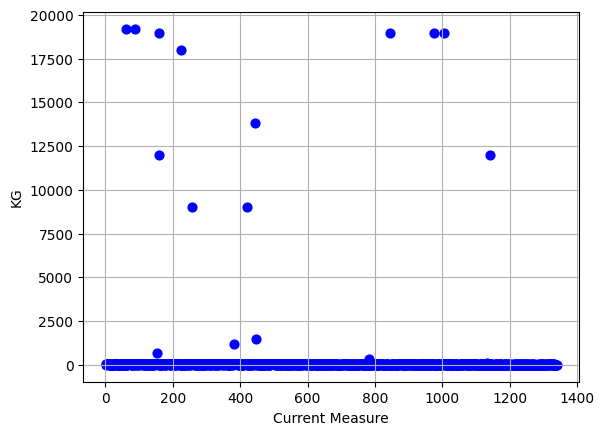

In [78]:
#Create scatter plot to see what kind of results from the measurment are in the column weight_bag_kg
scatter_data = pd.DataFrame({
    'id': range(1, len(converted_data) + 1),
    'weight_kg': converted_data
})

plt.scatter(scatter_data.id, scatter_data.weight_kg, color='blue', s=40)
plt.xlabel("Current Measure")
plt.ylabel("KG")
plt.grid(True)
plt.show()

In [79]:
#Overwriting the cleaned data
data.bag_weight_kg = converted_data
data

,id,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

In [80]:
#Convert all dates only to 'YEAR' format
data.harvest_year = data.harvest_year.map(lambda x: str(x)[-4:] if pd.notna(x) else x)
data.harvest_year

0       2014
1       2014
2        NaN
3       2014
4       2014
        ... 
1334    2016
1335    2016
1336    2014
1337    2013
1338    2013
Name: harvest_year, Length: 1339, dtype: object

In [81]:
#Convert dates to d-m-Y format
data.expiration = data.expiration.map(
    lambda x: parse(x).strftime('%d-%m-%Y') if pd.notna(x) else x
)

In [82]:
data.expiration

0       03-04-2016
1       03-04-2016
2       31-05-2011
3       25-03-2016
4       03-04-2016
           ...    
1334    18-01-2017
1335    18-01-2017
1336    23-12-2015
1337    25-08-2015
1338    25-08-2015
Name: expiration, Length: 1339, dtype: object

In [83]:
#Convert dates to d-m-Y format
data.grading_date = data.grading_date.map(
    lambda x: parse(x).strftime('%d-%m-%Y') if pd.notna(x) else x
)

In [123]:
data.grading_date

0       04-04-2015
1       04-04-2015
2       31-05-2010
3       26-03-2015
4       04-04-2015
           ...    
1334    19-01-2016
1335    19-01-2016
1336    23-12-2014
1337    25-08-2014
1338    25-08-2014
Name: grading_date, Length: 1339, dtype: object

### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

In [85]:
data.country_of_origin.value_counts(dropna=False)

country_of_origin
Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         32
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
India                            14
Malawi                           11
United States                    10
Peru                             10
Vietnam                           8
Myanmar                           8
Haiti                             6
Philippines                       5
United States (Puerto Rico)       4
Panama                            4
Laos      

In [86]:
#Read data which has not country of origin
data[data.country_of_origin.isna()]

,id,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1197,1197,Arabica,racafe & cia s.c.a,NaN,NaN,NaN,NaN,3-37-1980,NaN,NaN,...,NaN,3,29-02-2012,Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN


In [87]:
#Print the number of records with unknown country of origin
print(f'There is {data.country_of_origin.isna().sum()} coffee/s with unknown country/ies of origin')

There is 1 coffee/s with unknown country/ies of origin


### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

In [88]:
#Read column 'owner'
data.owner = data.owner.str.lower()
data.owner.value_counts()

owner
juan luis alvarado romero            155
racafe & cia s.c.a                    60
exportadora de cafe condor s.a        54
kona pacific farmers cooperative      52
ipanema coffees                       50
                                    ... 
kasozi coffee farmers association      1
nitubaasa ltd                          1
mannya coffee project                  1
yidnekachew dabessa                    1
james moore                            1
Name: count, Length: 315, dtype: int64

In [89]:
#Read column 'owner_1'
data.owner_1 = data.owner_1.str.lower()
data.owner_1.value_counts()

owner_1
juan luis alvarado romero           155
racafe & cia s.c.a                   60
exportadora de cafe condor s.a       54
kona pacific farmers cooperative     52
ipanema coffees                      50
                                   ... 
yidnekachew dabessa                   1
francisco a mena                      1
specialty coffee-korea                1
nora zeas                             1
james moore                           1
Name: count, Length: 319, dtype: int64

In [90]:
#Read column 'producer'
data.producer = data.producer.str.lower()
data.producer.value_counts()

producer
la plata                             39
ipanema agrícola sa                  22
varios                               20
doi tung development project         17
ipanema agricola                     12
                                     ..
nishant gurger                        1
kigezi coffee farmers association     1
mannya coffee project                 1
idalina m. de andrade ferreira        1
coeb koperativ ekselsyo basen         1
Name: count, Length: 666, dtype: int64

### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

In [91]:
#Group by countries of origin and color, then we count the rows in every group. Return the result in normal table with reset_index and we named the column with name='Count'
countries_and_color = data.groupby(['country_of_origin', 'color']).size().reset_index(name='Count')
countries_and_color


,country_of_origin,color,Count
0,Brazil,Blue-Green,14
1,Brazil,Bluish-Green,12
2,Brazil,Green,92
3,Burundi,Green,1
4,China,Green,16
...,...,...,...
74,United States (Hawaii),Green,21
75,United States (Puerto Rico),Bluish-Green,1
76,United States (Puerto Rico),Green,3
77,Vietnam,Bluish-Green,1


In [92]:
def clean_country_name(country):
    return country.replace('?', '')

countries_and_color.country_of_origin = countries_and_color.country_of_origin.apply(
    lambda x: clean_country_name(x)
)

In [93]:
countries_and_color

,country_of_origin,color,Count
0,Brazil,Blue-Green,14
1,Brazil,Bluish-Green,12
2,Brazil,Green,92
3,Burundi,Green,1
4,China,Green,16
...,...,...,...
74,United States (Hawaii),Green,21
75,United States (Puerto Rico),Bluish-Green,1
76,United States (Puerto Rico),Green,3
77,Vietnam,Bluish-Green,1


In [94]:
def get_region(country_name):
    try:
        return CountryInfo(country_name).info().get('region')
    except:
        return None

countries_in_continents = countries_and_color.copy()
countries_in_continents.country_of_origin = countries_and_color.country_of_origin.apply(get_region)
countries_in_continents = countries_in_continents.rename(columns={"country_of_origin": "continent"})
countries_in_continents

,continent,color,Count
0,Americas,Blue-Green,14
1,Americas,Bluish-Green,12
2,Americas,Green,92
3,Africa,Green,1
4,Asia,Green,16
...,...,...,...
74,None,Green,21
75,None,Bluish-Green,1
76,None,Green,3
77,Asia,Bluish-Green,1


In [95]:
rows = []

grouped = countries_in_continents.groupby("continent")

for continent, group in grouped:
    first = True
    for color in group.color:
        if first:
            rows.append({"continent": continent, "color": color})
            first = False
        else:
            rows.append({"continent": "", "color": color})

grouped_table = pd.DataFrame(rows)
grouped_table

,continent,color
0,Africa,Green
1,,Bluish-Green
2,,Green
3,,Blue-Green
4,,Bluish-Green
...,...,...
65,,Bluish-Green
66,,Green
67,,Bluish-Green
68,,Green


### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

In [96]:
#Read all dataset
data

,id,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,03-04-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,03-04-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,31-05-2011,Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,25-03-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,03-04-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,18-01-2017,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,18-01-2017,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,23-12-2015,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,25-08-2015,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [97]:
#Read a specific part from the dataset
rating_data = data[['aroma', 'flavor', 'aftertaste', 'acidity', 
                    'body', 'balance', 'uniformity', 'clean_cup', 
                    'sweetness', 'cupper_points', 'total_cup_points', 
                    'moisture']]

rating_data

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture
0,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12
1,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12
2,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00
3,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11
4,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...
1334,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00
1335,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00
1336,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00
1337,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10


In [98]:
rating_data[rating_data['aroma'] < 1]

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture
1310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12


In [99]:
data[data.id == 1310]

,id,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1310,1310,Arabica,bismarck castro,Honduras,los hicaques,103,cigrah s.a de c.v.,13-111-053,cigrah s.a de c.v,1400,...,Green,2,28-04-2018,Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0


In [100]:
min_val = rating_data[rating_data['aroma'] > 0]['aroma'].min()
min_val

np.float64(5.08)

In [101]:
def get_stats_table_no_zero_values(dataset):
    stats = []
    
    for feature in dataset.select_dtypes(include='number'):
        non_zero_values = dataset[dataset[feature] > 0][feature]
        if not non_zero_values.empty:
            mean = dataset[feature].mean()
            min_value = non_zero_values.min()
            max_value = non_zero_values.max()
            value_range = max_value - min_value
            std = dataset[feature].std()
            
            stats.append({
                'Feature': feature.capitalize(),
                'Mean Value': round(mean, 4),
                'Min Value': round(min_value, 4),
                'Max Value': round(max_value, 4),
                'Range': round(value_range, 4),
                'Std Dev': round(std, 4)
            })

    df = pd.DataFrame(stats)
    return tabulate(df, headers='keys', tablefmt='fancy_grid', floatfmt=".4f")

print(get_stats_table_no_zero_values(rating_data))

╒════╤══════════════════╤══════════════╤═════════════╤═════════════╤═════════╤═══════════╕
│    │ Feature          │   Mean Value │   Min Value │   Max Value │   Range │   Std Dev │
╞════╪══════════════════╪══════════════╪═════════════╪═════════════╪═════════╪═══════════╡
│  0 │ Aroma            │       7.5667 │      5.0800 │      8.7500 │  3.6700 │    0.3776 │
├────┼──────────────────┼──────────────┼─────────────┼─────────────┼─────────┼───────────┤
│  1 │ Flavor           │       7.5204 │      6.0800 │      8.8300 │  2.7500 │    0.3984 │
├────┼──────────────────┼──────────────┼─────────────┼─────────────┼─────────┼───────────┤
│  2 │ Aftertaste       │       7.4011 │      6.1700 │      8.6700 │  2.5000 │    0.4045 │
├────┼──────────────────┼──────────────┼─────────────┼─────────────┼─────────┼───────────┤
│  3 │ Acidity          │       7.5357 │      5.2500 │      8.7500 │  3.5000 │    0.3798 │
├────┼──────────────────┼──────────────┼─────────────┼─────────────┼─────────┼───────────┤

In [102]:
#We can use describe method as well. As we see, this method returns mean value, std, min and max and quartiles of the datas.
rating_data.describe()

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,7.503376,82.089851,0.088379
std,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.473464,3.500575,0.048287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000
50%,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000


In [103]:
#The function return table with feature and his mean value
def get_stats_table(dataset):
    stats = []
    
    for feature in dataset.select_dtypes(include='number'):
        mean = dataset[feature].mean()
        min_value = dataset[feature].min()
        max_value = dataset[feature].max()
        value_range = max_value - min_value
        std = dataset[feature].std()
        
        stats.append({
            'Feature': feature.capitalize(),
            'Mean Value': round(mean, 4),
            'Min Value': round(min_value, 4),
            'Max Value': round(max_value, 4),
            'Range': round(value_range, 4),
            'Std Dev': round(std, 4)
        })
   
    df = pd.DataFrame(stats)
    return tabulate(df, headers='keys', tablefmt='fancy_grid', floatfmt=".4f")

print(get_stats_table(rating_data))

╒════╤══════════════════╤══════════════╤═════════════╤═════════════╤═════════╤═══════════╕
│    │ Feature          │   Mean Value │   Min Value │   Max Value │   Range │   Std Dev │
╞════╪══════════════════╪══════════════╪═════════════╪═════════════╪═════════╪═══════════╡
│  0 │ Aroma            │       7.5667 │      0.0000 │      8.7500 │  8.7500 │    0.3776 │
├────┼──────────────────┼──────────────┼─────────────┼─────────────┼─────────┼───────────┤
│  1 │ Flavor           │       7.5204 │      0.0000 │      8.8300 │  8.8300 │    0.3984 │
├────┼──────────────────┼──────────────┼─────────────┼─────────────┼─────────┼───────────┤
│  2 │ Aftertaste       │       7.4011 │      0.0000 │      8.6700 │  8.6700 │    0.4045 │
├────┼──────────────────┼──────────────┼─────────────┼─────────────┼─────────┼───────────┤
│  3 │ Acidity          │       7.5357 │      0.0000 │      8.7500 │  8.7500 │    0.3798 │
├────┼──────────────────┼──────────────┼─────────────┼─────────────┼─────────┼───────────┤

In [104]:
#Correlation table between the features
def get_correlation_table(dataset):
    corr = dataset.corr(numeric_only=True).round(4)
    return corr

print(f"Correlation between the features\n\n{get_correlation_table(rating_data)}")

Correlation between the features

                   aroma  flavor  aftertaste  acidity    body  balance  \
aroma             1.0000  0.8133      0.7771   0.7236  0.6730   0.7086   
flavor            0.8133  1.0000      0.8957   0.8167  0.7357   0.7923   
aftertaste        0.7771  0.8957      1.0000   0.7923  0.7343   0.8096   
acidity           0.7236  0.8167      0.7923   1.0000  0.7064   0.7330   
body              0.6730  0.7357      0.7343   0.7064  1.0000   0.7576   
balance           0.7086  0.7923      0.8096   0.7330  0.7576   1.0000   
uniformity        0.3666  0.4109      0.4015   0.3754  0.3269   0.4009   
clean_cup         0.3357  0.3970      0.3867   0.3009  0.2766   0.3703   
sweetness         0.2535  0.2911      0.2664   0.2619  0.2683   0.2833   
cupper_points     0.6873  0.7932      0.7851   0.6982  0.6332   0.7211   
total_cup_points  0.7916  0.8743      0.8607   0.7970  0.7572   0.8285   
moisture         -0.1341 -0.1452     -0.1805  -0.1291 -0.1477  -0.1998   

   

### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

In [105]:
#Read original data and create a copy
data_with_regions = data[['country_of_origin', 'altitude', 'company']].copy()
data_with_regions

,country_of_origin,altitude,company
0,Ethiopia,1950-2200,metad agricultural developmet plc
1,Ethiopia,1950-2200,metad agricultural developmet plc
2,Guatemala,1600 - 1800 m,NaN
3,Ethiopia,1800-2200,yidnekachew debessa coffee plantation
4,Ethiopia,1950-2200,metad agricultural developmet plc
...,...,...,...
1334,Ecuador,NaN,robustasa
1335,Ecuador,40,robustasa
1336,United States,795 meters,global opportunity fund
1337,India,NaN,cafe politico


In [106]:
# With the previous function get_region we set a region to every country in the dataset
data_with_regions['region'] = data.country_of_origin.apply(get_region)

#Order the columns as we want
data_with_regions = data_with_regions[['country_of_origin', 'region', 'altitude', 'company']]

#Read the datas
data_with_regions

,country_of_origin,region,altitude,company
0,Ethiopia,Africa,1950-2200,metad agricultural developmet plc
1,Ethiopia,Africa,1950-2200,metad agricultural developmet plc
2,Guatemala,Americas,1600 - 1800 m,NaN
3,Ethiopia,Africa,1800-2200,yidnekachew debessa coffee plantation
4,Ethiopia,Africa,1950-2200,metad agricultural developmet plc
...,...,...,...,...
1334,Ecuador,Americas,NaN,robustasa
1335,Ecuador,Americas,40,robustasa
1336,United States,Americas,795 meters,global opportunity fund
1337,India,Asia,NaN,cafe politico


In [107]:
#I want to check the first company for any discrepancies
data_with_regions[(data_with_regions['country_of_origin'] == 'Ethiopia') & (data_with_regions['company'] == 'metad agricultural developmet plc')]

,country_of_origin,region,altitude,company
0,Ethiopia,Africa,1950-2200,metad agricultural developmet plc
1,Ethiopia,Africa,1950-2200,metad agricultural developmet plc
4,Ethiopia,Africa,1950-2200,metad agricultural developmet plc


In [108]:
#Rename the column altitude to altitude_m for better understanding
data_with_regions.rename(columns={'altitude': 'altitude_m'}, inplace=True)

In [109]:
data_with_regions

,country_of_origin,region,altitude_m,company
0,Ethiopia,Africa,1950-2200,metad agricultural developmet plc
1,Ethiopia,Africa,1950-2200,metad agricultural developmet plc
2,Guatemala,Americas,1600 - 1800 m,NaN
3,Ethiopia,Africa,1800-2200,yidnekachew debessa coffee plantation
4,Ethiopia,Africa,1950-2200,metad agricultural developmet plc
...,...,...,...,...
1334,Ecuador,Americas,NaN,robustasa
1335,Ecuador,Americas,40,robustasa
1336,United States,Americas,795 meters,global opportunity fund
1337,India,Asia,NaN,cafe politico


In [110]:
data_with_regions.altitude_m = data_with_regions.altitude_m.astype(str).str.replace(' ', '', regex=False)
data_with_regions

,country_of_origin,region,altitude_m,company
0,Ethiopia,Africa,1950-2200,metad agricultural developmet plc
1,Ethiopia,Africa,1950-2200,metad agricultural developmet plc
2,Guatemala,Americas,1600-1800m,NaN
3,Ethiopia,Africa,1800-2200,yidnekachew debessa coffee plantation
4,Ethiopia,Africa,1950-2200,metad agricultural developmet plc
...,...,...,...,...
1334,Ecuador,Americas,nan,robustasa
1335,Ecuador,Americas,40,robustasa
1336,United States,Americas,795meters,global opportunity fund
1337,India,Asia,nan,cafe politico


In [111]:
def remove_non_digits_symbols(text):
    if pd.isna(text):
        return np.nan

    return ''.join(char for char in str(text) if char.isdigit() or char == '-' or char == '~' or char == 'a')

In [112]:
def replace_symbols(text, symbol_for_replace):
    if pd.isna(text):
        return np.nan
    
    return str(text).replace(symbol_for_replace, '-')

In [113]:
def return_nan(text):
    if text == '-' or text == '':
        return  np.nan
    return text

In [114]:
def remove_dash_from_start_or_end_of_text(text):
    if pd.isna(text):
        return text
    return str(text).strip('-')

In [115]:
data_with_regions.altitude_m = data_with_regions.altitude_m.apply(remove_non_digits_symbols)
data_with_regions.altitude_m = data_with_regions.altitude_m.apply(replace_symbols, args=('a',))
data_with_regions.altitude_m = data_with_regions.altitude_m.apply(replace_symbols, args=('~',))
data_with_regions.altitude_m = data_with_regions.altitude_m.apply(return_nan)
data_with_regions.altitude_m = data_with_regions.altitude_m.apply(remove_dash_from_start_or_end_of_text)
data_with_regions.loc[data_with_regions['altitude_m'] == '12001350', 'altitude_m'] = '1200-1350'

data_with_regions

,country_of_origin,region,altitude_m,company
0,Ethiopia,Africa,1950-2200,metad agricultural developmet plc
1,Ethiopia,Africa,1950-2200,metad agricultural developmet plc
2,Guatemala,Americas,1600-1800,NaN
3,Ethiopia,Africa,1800-2200,yidnekachew debessa coffee plantation
4,Ethiopia,Africa,1950-2200,metad agricultural developmet plc
...,...,...,...,...
1334,Ecuador,Americas,NaN,robustasa
1335,Ecuador,Americas,40,robustasa
1336,United States,Americas,795,global opportunity fund
1337,India,Asia,NaN,cafe politico


In [116]:
data

,id,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,03-04-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,03-04-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,31-05-2011,Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,25-03-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,03-04-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,18-01-2017,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,18-01-2017,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,23-12-2015,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,25-08-2015,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [117]:
new_d = data[['country_of_origin', 'altitude']]
new_d[(new_d['country_of_origin'] == 'Colombia') | (new_d['country_of_origin'] == 'Brazil')]

,country_of_origin,altitude
5,Brazil,NaN
25,Brazil,1250m
32,Brazil,1300
41,Brazil,1.2
42,Brazil,1.2
...,...,...
1253,Brazil,890
1273,Brazil,NaN
1292,Brazil,NaN
1295,Colombia,NaN


### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!

In [118]:
#Read main dataset
data

,id,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,03-04-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,03-04-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,31-05-2011,Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,25-03-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,03-04-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,18-01-2017,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,18-01-2017,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,23-12-2015,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,25-08-2015,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [119]:
#Replace the column from main dataset with this columns
data_with_regions

,country_of_origin,region,altitude_m,company
0,Ethiopia,Africa,1950-2200,metad agricultural developmet plc
1,Ethiopia,Africa,1950-2200,metad agricultural developmet plc
2,Guatemala,Americas,1600-1800,NaN
3,Ethiopia,Africa,1800-2200,yidnekachew debessa coffee plantation
4,Ethiopia,Africa,1950-2200,metad agricultural developmet plc
...,...,...,...,...
1334,Ecuador,Americas,NaN,robustasa
1335,Ecuador,Americas,40,robustasa
1336,United States,Americas,795,global opportunity fund
1337,India,Asia,NaN,cafe politico


In [120]:
data['altitude'] = data_with_regions['altitude_m']
data['country_of_origin'] = data_with_regions['country_of_origin']
data['continent'] = data_with_regions['region'].reset_index(drop=True)
data['company'] = data_with_regions['company']

In [121]:
data

,id,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,continent
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,0,03-04-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,Africa
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,1,03-04-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,Africa
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600-1800,...,0,31-05-2011,Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0,Americas
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,2,25-03-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0,Africa
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,2,03-04-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,1,18-01-2017,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN,Americas
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,0,18-01-2017,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0,Americas
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795,...,6,23-12-2015,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0,Americas
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,1,25-08-2015,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN,Asia


In [122]:
#Change order of the columns and set continent column right after country of origin
cols = data.columns.tolist()
cols.remove('continent')
insert_after = 'country_of_origin'
index = cols.index(insert_after) + 1
cols.insert(index, 'continent')

data = data[cols]
data = data.rename(columns={'altitude': 'altitude_m'})
data

,id,species,owner,country_of_origin,continent,farm_name,lot_number,mill,ico_number,company,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,Africa,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,...,Green,0,03-04-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,Africa,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,...,Green,1,03-04-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,Americas,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,...,NaN,0,31-05-2011,Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,Africa,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,...,Green,2,25-03-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,Africa,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,...,Green,2,03-04-2016,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,Americas,robustasa,Lavado 1,our own lab,NaN,robustasa,...,Blue-Green,1,18-01-2017,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,Americas,robustasa,Lavado 3,own laboratory,NaN,robustasa,...,Blue-Green,0,18-01-2017,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,Americas,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,...,NaN,6,23-12-2015,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,Asia,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,...,Green,1,25-08-2015,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
